In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [10]:
data = pd.read_csv('C:\\Users\\dimag\\Desktop\\Mash_learning\\Lab3\\survey.csv')
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
data.shape

(1259, 27)

In [12]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [13]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [14]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1259


# Обработка пропусков данных в категориях

In [34]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
empty = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        empty.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка state. Тип данных object. Количество пустых значений 515, 40.91%.
Колонка self_employed. Тип данных object. Количество пустых значений 18, 1.43%.
Колонка work_interfere. Тип данных object. Количество пустых значений 264, 20.97%.
Колонка comments. Тип данных object. Количество пустых значений 1095, 86.97%.


In [36]:
temp_data = data[['state']]
temp_data.head()

,state
0,IL
1,IN
2,NaN
3,NaN
4,TX


In [38]:
temp_data['state'].unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

In [39]:
temp_data[cat_temp_data['state'].isnull()].shape

(515, 1)

In [41]:
# Выберем Импьютацию наиболее частыми значениями
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp = imp.fit_transform(temp_data)
data_imp

array([['IL'],
       ['IN'],
       ['CA'],
       ...,
       ['CA'],
       ['NC'],
       ['IL']], dtype=object)

In [42]:
np.unique(data_imp)

array(['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL',
       'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS',
       'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'WY'], dtype=object)

# Преобразование категориальных признаков в числовые (методом кодирования)

In [44]:
cat_enc = pd.DataFrame({'c1':data_imp.T[0]})
cat_enc

,c1
0,IL
1,IN
2,CA
3,CA
4,TX
...,...
1254,CA
1255,IL
1256,CA
1257,NC


In [49]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['IL', 'IN', 'CA', 'TX', 'TN', 'MI', 'OH', 'CT', 'MD', 'NY', 'NC',
       'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN', 'MO',
       'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH', 'KY',
       'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY', 'LA',
       'ME'], dtype=object)

In [50]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [51]:
le.inverse_transform([0, 1, 2, 3])

array(['AL', 'AZ', 'CA', 'CO'], dtype=object)

# Масштабирования данных

In [75]:
data1 = pd.read_csv('C:\\Users\\dimag\\Desktop\\Mash_learning\\Lab3\\avocado.csv')
data1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


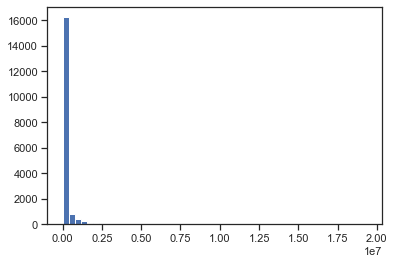

In [77]:
plt.hist(data1['Total Bags'], 50)
plt.show()

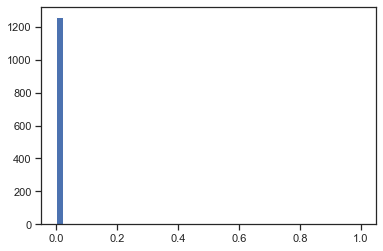

In [78]:
plt.hist(sc1_data, 50)
plt.show()